**PROJECT ON PREDICTING DIABETES**

This project aims to utilize predictive analytics and machine learning techniques to create a reliable model for early diabetes detection. By employing classification algorithms such as Logistic Regression, KNN, SVM, Decision Tree, XGBoost, Random Forest others on the Pima Indians Diabetes Database, the study aims to assist healthcare professionals in making timely decisions about patients' health. Through measures like Precision, Accuracy, Specificity, and Recall, the effectiveness of each algorithm is evaluated, providing insights into which method is better suited for diabetes prediction. Ultimately, the goal is to support early detection efforts and improve patient outcomes through data-driven approaches in healthcare.

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
## To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading dataset
di = pd.read_excel("diabetes.xlsx")
di.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis (EDA)

In [ ]:
## view the list of column names
di.columns

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Renaming columns
di.rename(columns={'\xa0Pregnancies': 'Pregnancies','Blood Pressure': 'BloodPressure',
                   'Skin Thickness': 'SkinThickness',
                   'Diabetes Pedigree Function': 'DiabetesPedigreeFunction'},
          inplace=True)

In [ ]:
#To know the number of rows and columns
di.shape

(768, 9)

In [ ]:
# Generating descriptive statistics for the DataFrame
di.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The presence of minimum values of 0 in certain columns, especially those representing physiological measurements like glucose levels or blood pressure, suggests potential issues with data quality. In healthcare contexts, such values are unlikely and may indicate missing or invalid data. It's crucial to address these discrepancies through data cleaning techniques like removal or imputation using statistical methods. This step ensures the accuracy and reliability of any analysis or model built on the dataset, leading to more meaningful insights and reliable predictions.

In [ ]:
# Displaying information about the  DataFrame
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Counting unique categories in each column of 'di' and printing the results.
for col in di.columns:
  print('{} has {} no of unique categories'.format(col,di[col].nunique()))

Pregnancies has 17 no of unique categories
Glucose has 136 no of unique categories
BloodPressure has 47 no of unique categories
SkinThickness has 51 no of unique categories
Insulin has 186 no of unique categories
BMI has 248 no of unique categories
DiabetesPedigreeFunction has 517 no of unique categories
Age has 52 no of unique categories
Outcome has 2 no of unique categories


# Data preprocessing

In [ ]:
# Creating a new DataFrame 'di_f' containing all columns of 'di' except the last one.
di_f =di.iloc[:,:-1]

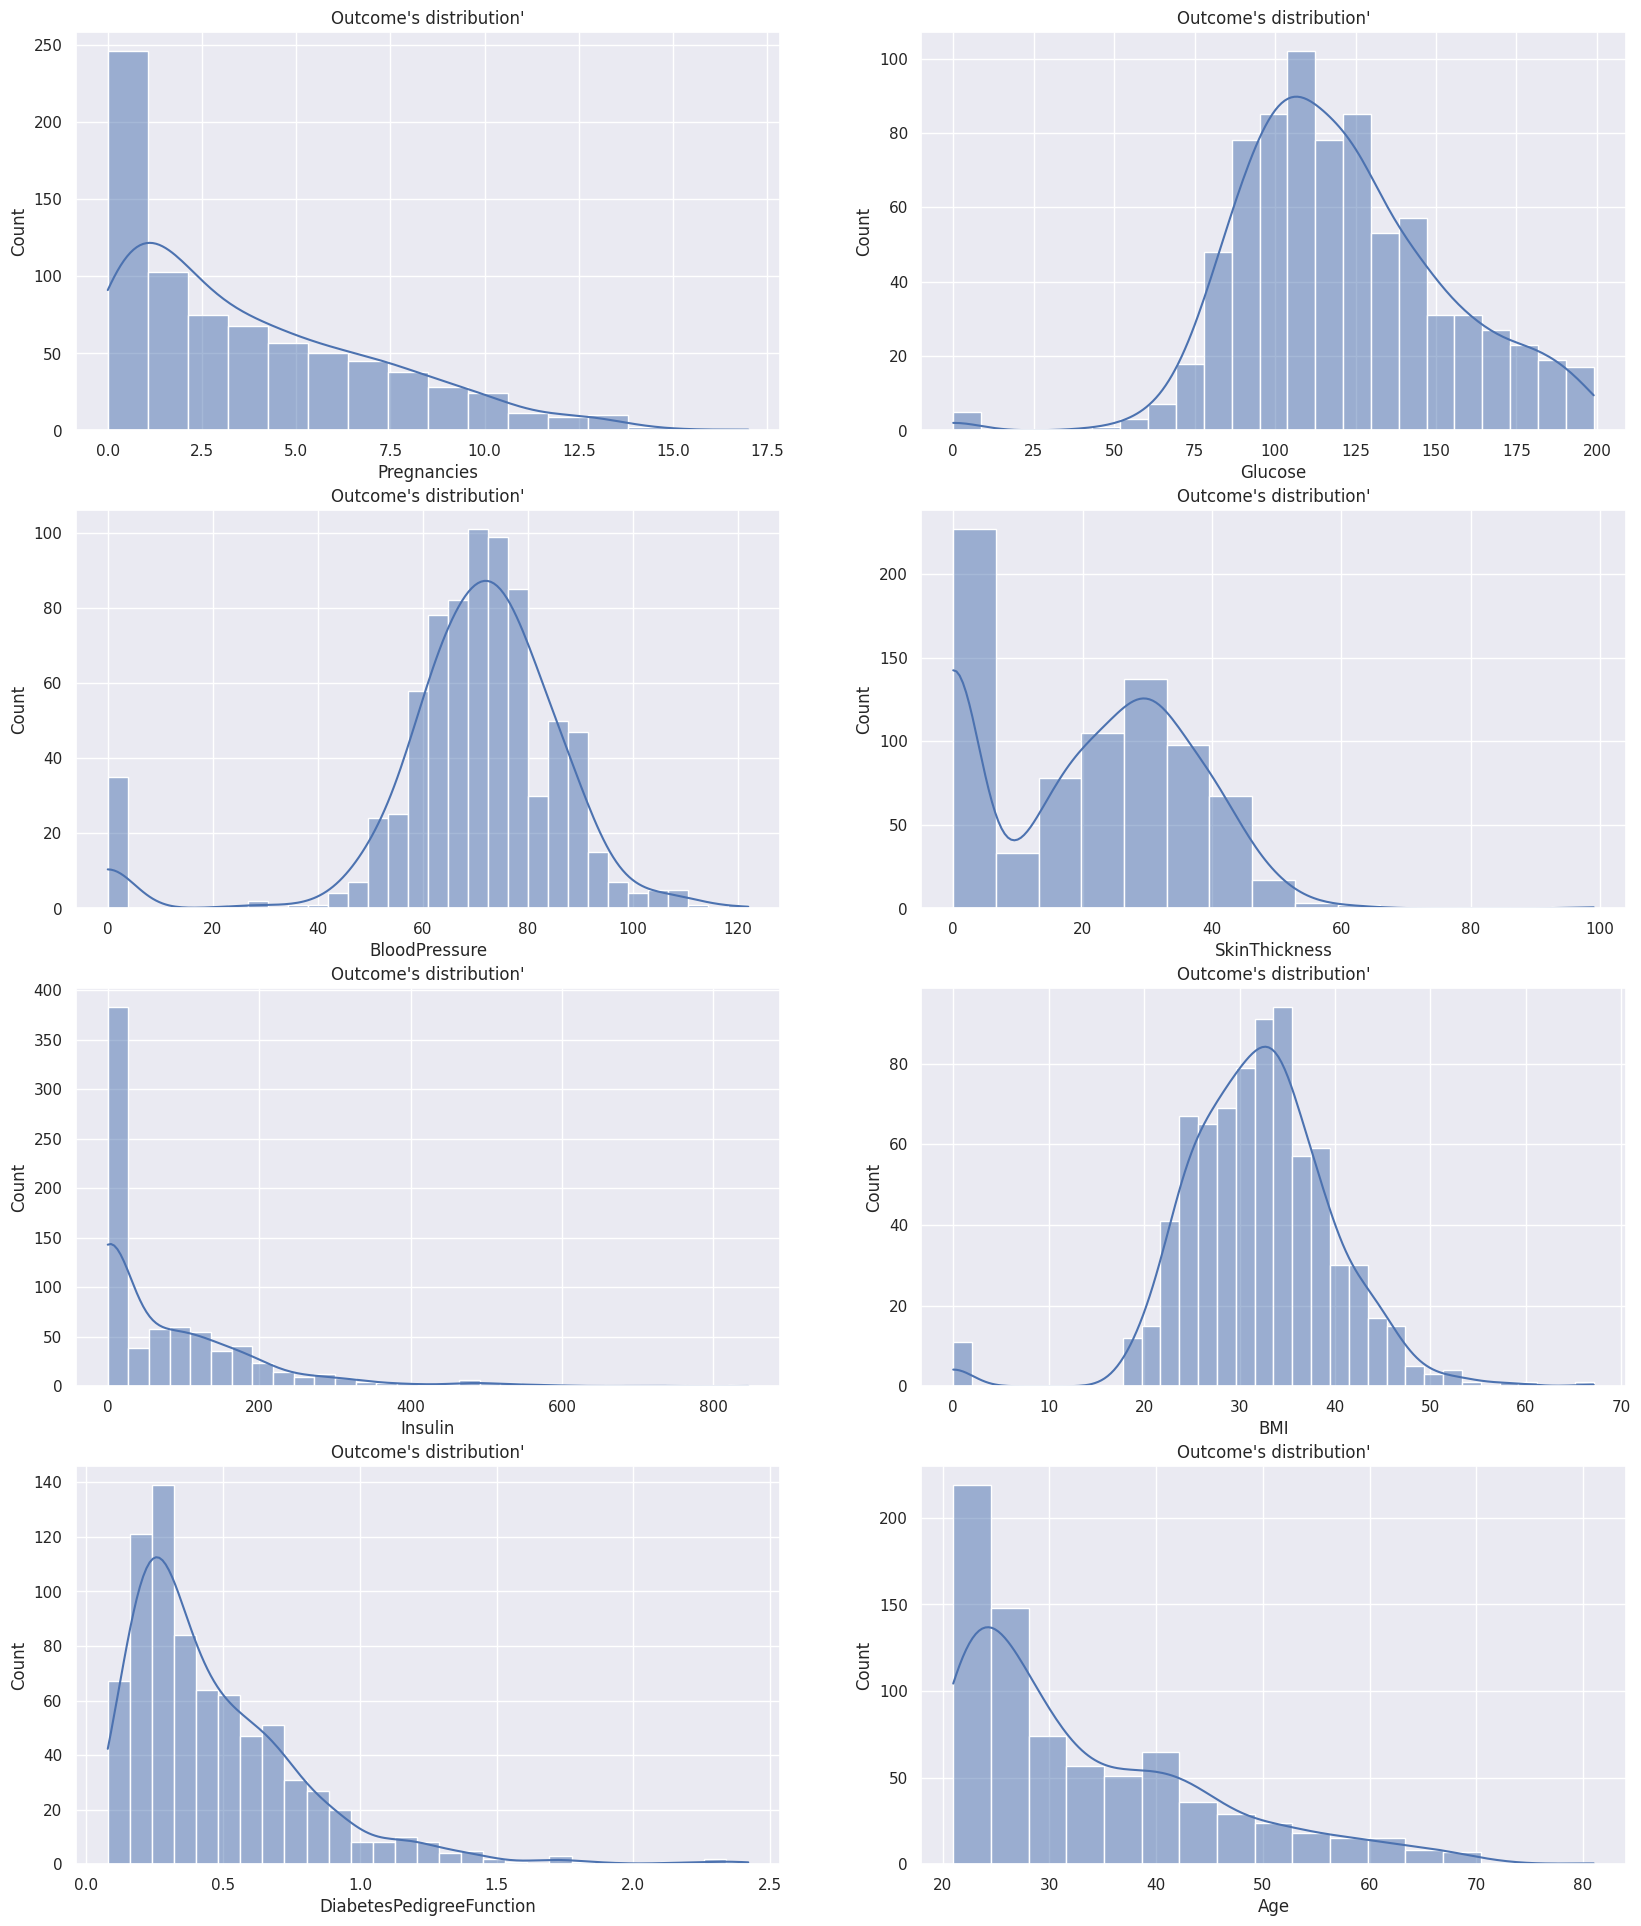

In [ ]:
# Plotting histograms for each column in 'di_f' to visualize their distributions
plt.figure(figsize=(20,30))
for i in enumerate(di_f.columns):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=di_f, x=i[1], kde=True)
  plt.title("{}'s distribution'".format(col))


When I plotted the histogram, I noticed that the distributions for glucose, BMI, insulin, and blood pressure extend down to zero. In healthcare, it's highly unlikely for these values to be zero, indicating potential data issues. We need to carefully investigate and handle these entries as they may represent missing or invalid data. This step is crucial for ensuring the reliability and accuracy of any analysis or model built on this dataset. Possible strategies include data imputation based on domain knowledge or statistical methods to address these discrepancies

Pregnancies, Insulin have right-skewed distributions, indicating outliers towards the right.

Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, Age have outliers towards the left.

#Imputation

In [ ]:
# replacing 0 with np.nan
di.Glucose[di.Glucose == 0] = np.nan
di.BloodPressure[di.BloodPressure == 0] = np.nan
di.SkinThickness[di.SkinThickness == 0] = np.nan
di.Insulin[di.Insulin == 0] = np.nan
di.BMI[di.BMI == 0] = np.nan
di.DiabetesPedigreeFunction[di.DiabetesPedigreeFunction == 0] = np.nan

In [ ]:
# Displaying the first few rows
di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
pip install fancyimpute

In [ ]:
## # Importing the KNN imputer from the fancyimpute library.
from fancyimpute import KNN
# Creating an instance of the KNN imputer
impute = KNN()

In [ ]:
# Using the KNN imputer to fill missing values in the DataFrame 'di'.
di.iloc[:, :] = impute.fit_transform(di)

Imputing row 1/768 with 1 missing, elapsed time: 0.100
Imputing row 101/768 with 2 missing, elapsed time: 0.103
Imputing row 201/768 with 1 missing, elapsed time: 0.106
Imputing row 301/768 with 3 missing, elapsed time: 0.108
Imputing row 401/768 with 2 missing, elapsed time: 0.111
Imputing row 501/768 with 0 missing, elapsed time: 0.113
Imputing row 601/768 with 1 missing, elapsed time: 0.115
Imputing row 701/768 with 0 missing, elapsed time: 0.117


In [ ]:
di

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,162.743255,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,62.914770,26.6,0.351,31,0
2,8,183.0,64.0,26.464588,180.726394,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,169.595752,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,32.886413,130.228539,30.1,0.349,47,1


In [ ]:
# Creating a copy of the DataFrame
data = di.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,162.743255,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,62.914770,26.6,0.351,31,0
2,8,183.0,64.0,26.464588,180.726394,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
## Selecting all columns except the last one as the feature set 'X'.
X_sample=data.iloc[:,:-1]

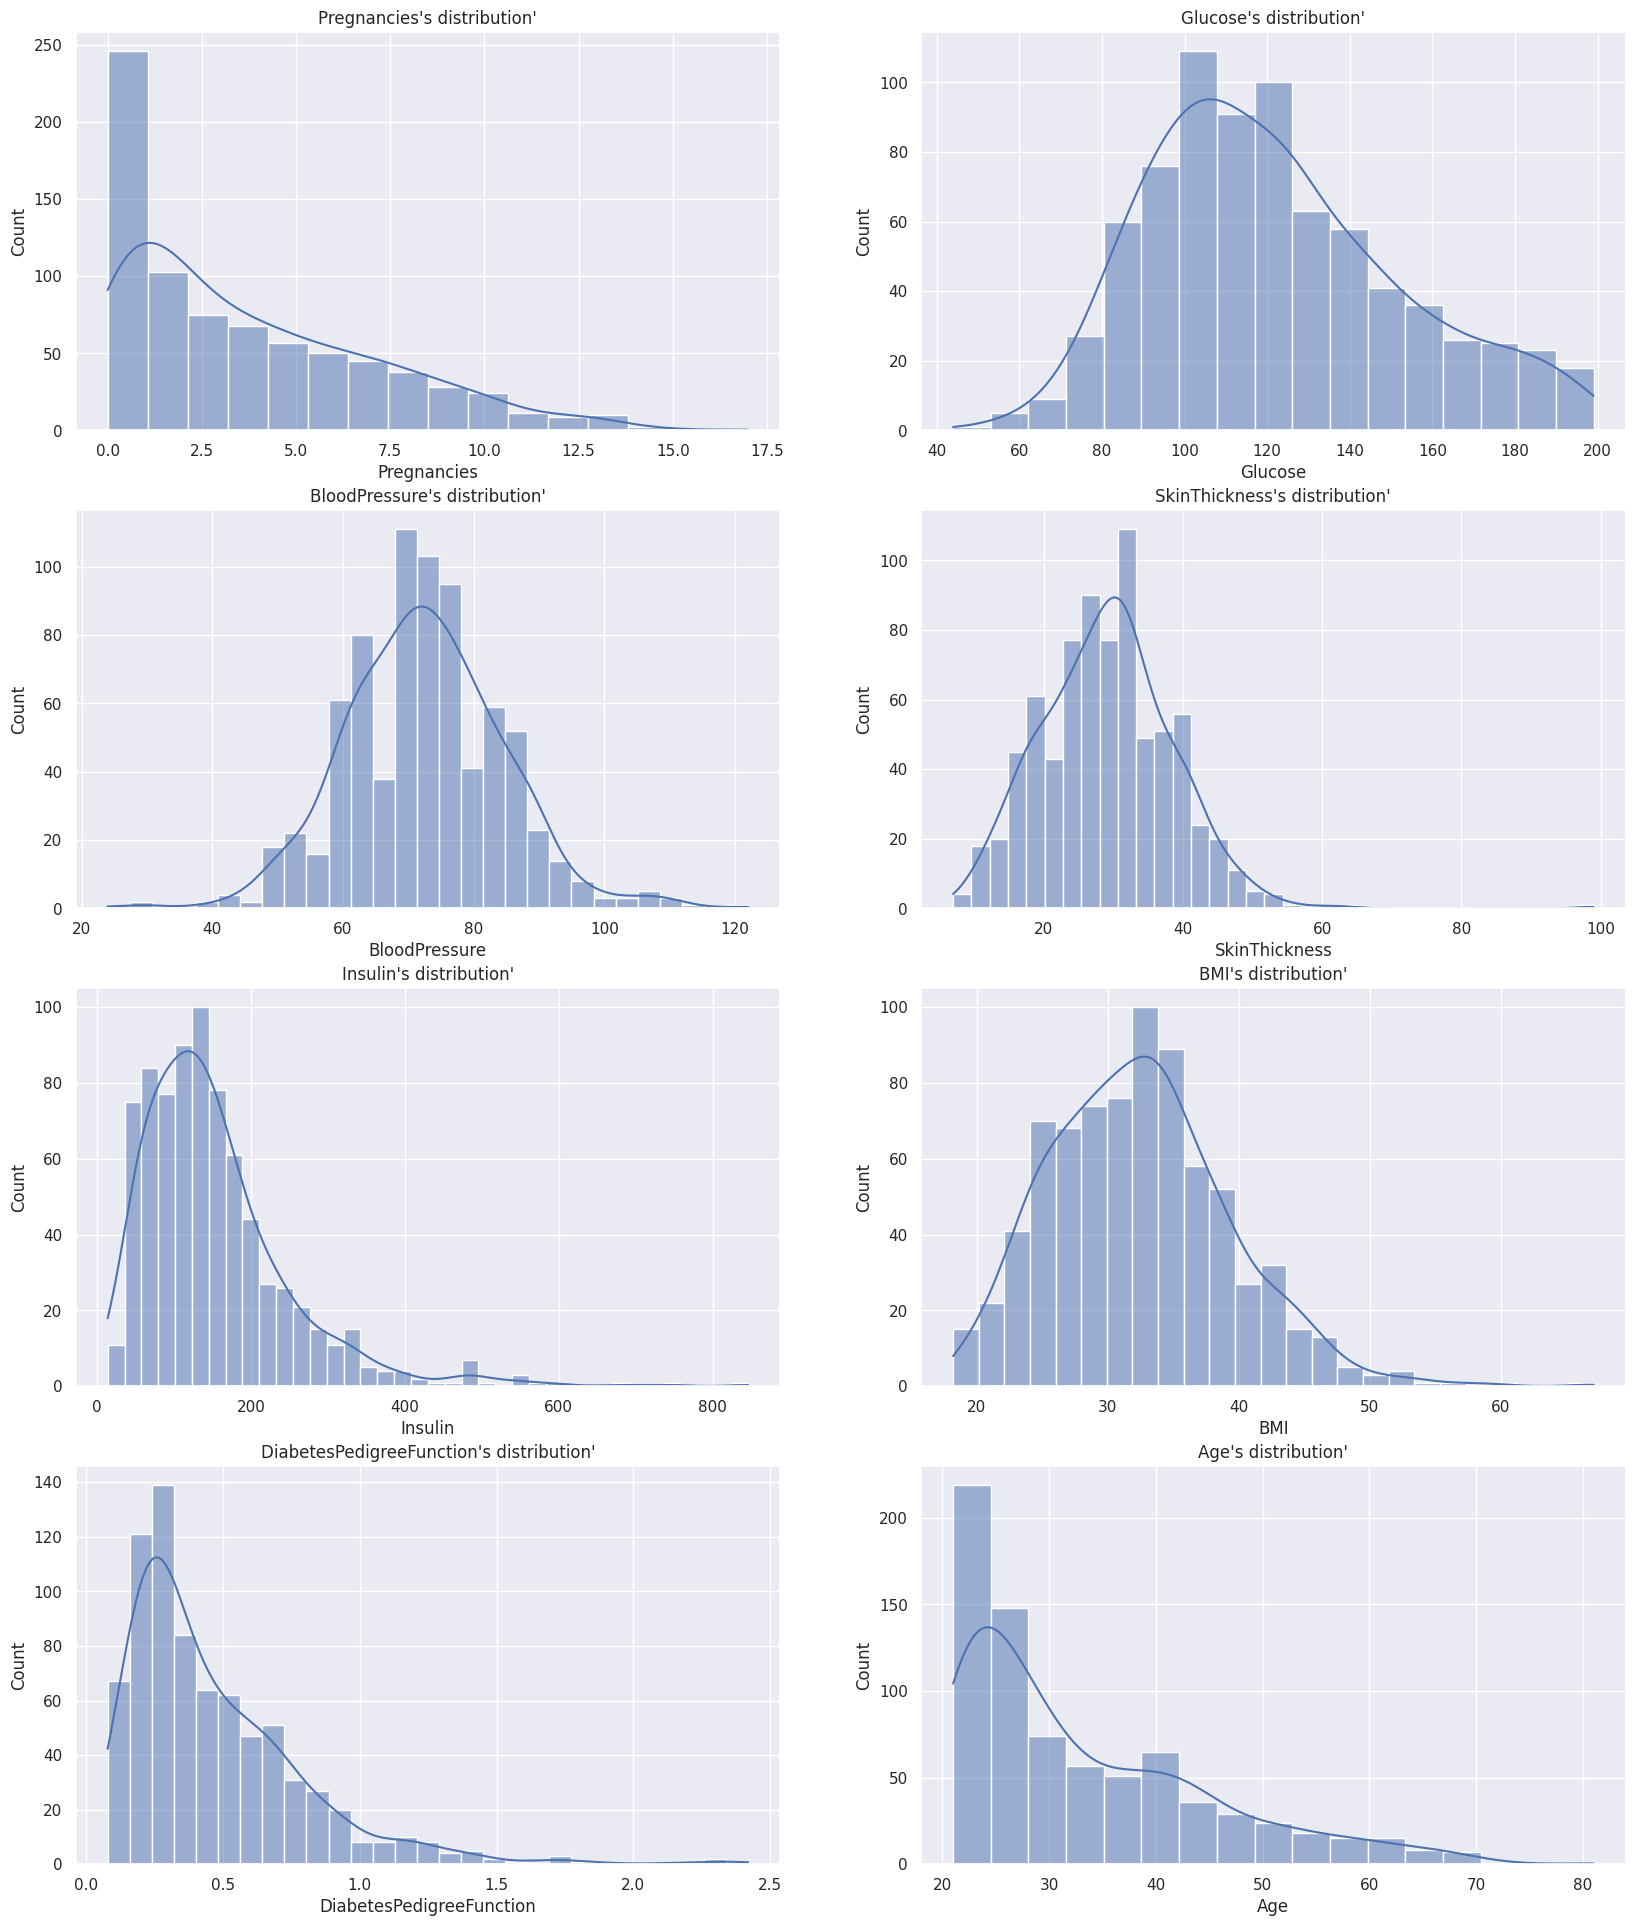

In [ ]:
 # Plotting histograms to visualize the distributions of each feature column in the DataFrame 'X'
plt.figure(figsize=(20,30))
for i, col in enumerate(X_sample.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data=X_sample, x=col, kde=True)
    plt.title("{}'s distribution'".format(col))


#Observations:

After replacing zero values with the means of the features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI, the skewness of their distributions has been slightly adjusted.

#CHECKING OUTLIER

In [ ]:
# Getting independent features
independent_features = [feature for feature in data.columns if feature != 'Outcome']
print(independent_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


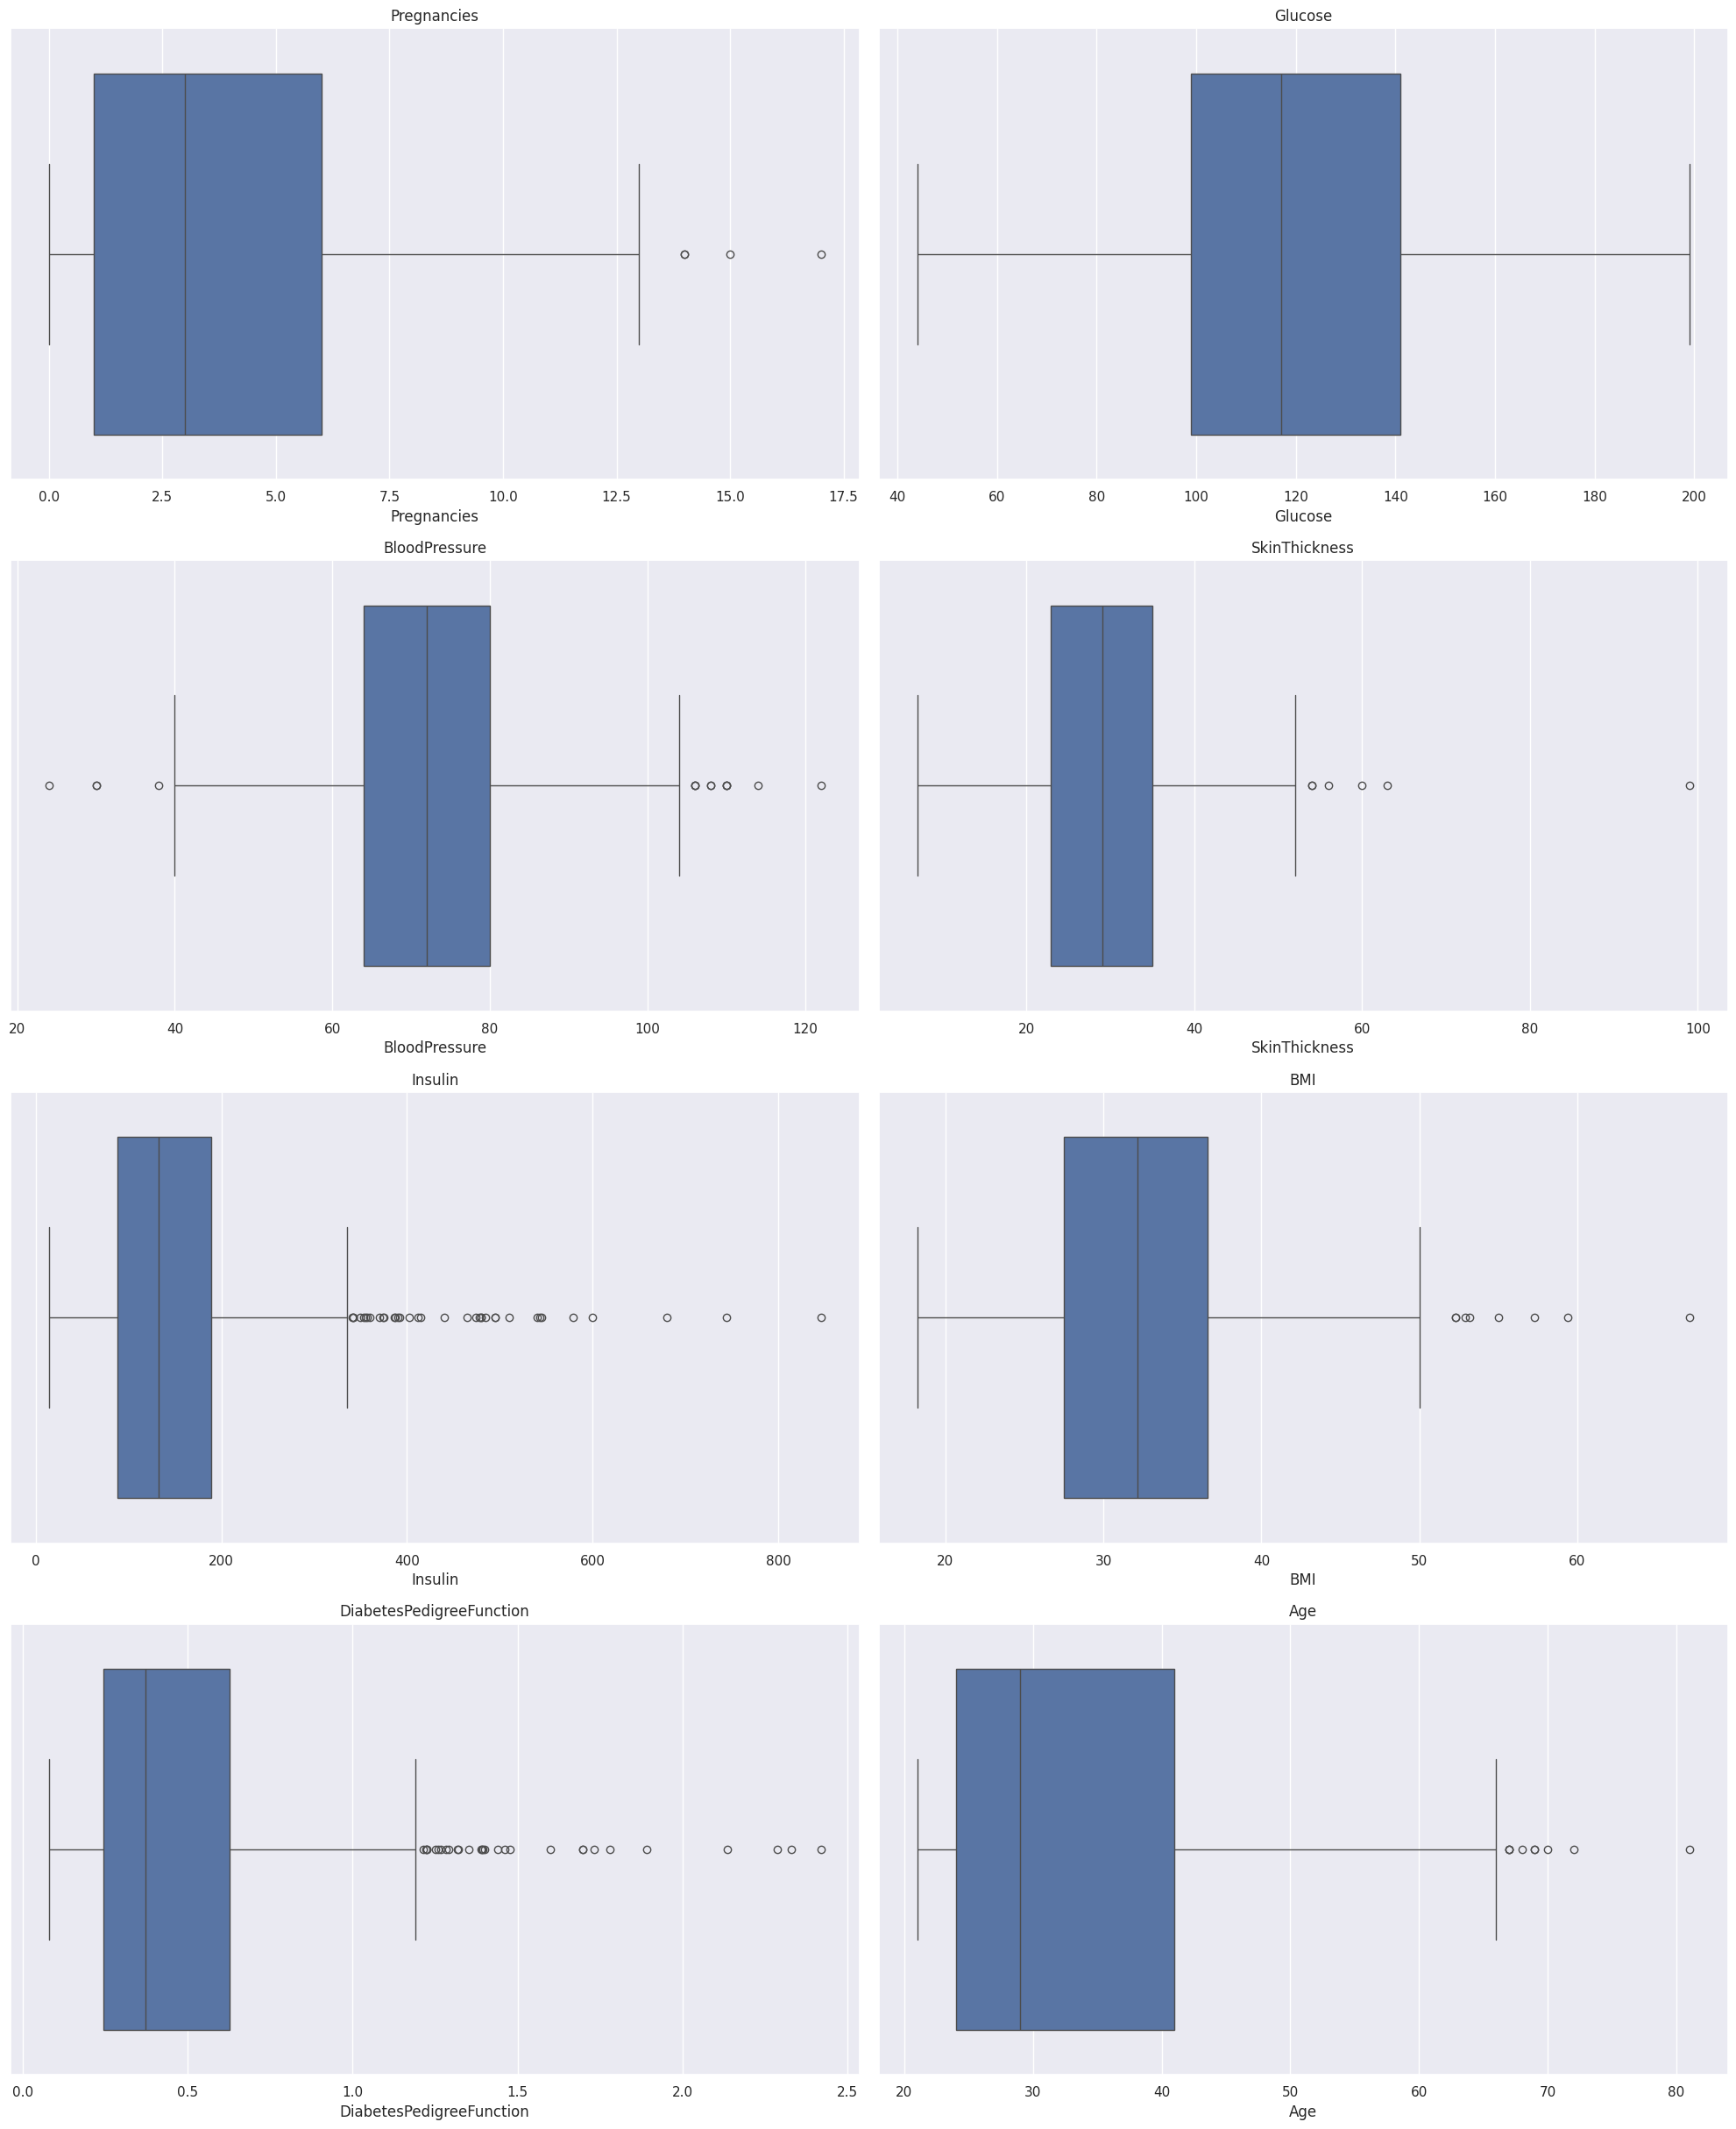

In [ ]:
## checking outlier is visual form
plt.figure(figsize = (20,30))
for i, feature in enumerate(independent_features):
  plt.subplot(5,2,i+1)
  sns.boxplot(data = data,x = feature)
  plt.title('{}'.format(feature))

plt.tight_layout()
plt.show()


After replacing zero values with means:

Glucose: No outliers

Pregnancies: Some outliers on upper boundary

BloodPressure: Outliers on both sides

SkinThickness, BMI, Age: Outliers on upper boundary

Insulin, DiabetesPedigreeFunction: Large number of outliers on upper boundary

In [ ]:
##Checking shape of DataFrame
data.shape

(768, 9)

In [ ]:
# Calculating the lower and upper bounds for outliers detection using the IQR method
# Loop through each column
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering outliers for each column
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000  162.743255  33.6   
1              1     85.0           66.0      29.000000   62.914770  26.6   
2              8    183.0           64.0      26.464588  180.726394  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      19.939565  106.227522  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000  169.595752  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      32.886413  130.228539  30.1   
767            1     93.0           70.0      31.000000   72.651916  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [ ]:
## Re-checking shape of DataFrame
data.shape

(663, 9)

Re-checking outliers after removing outliers in independent features

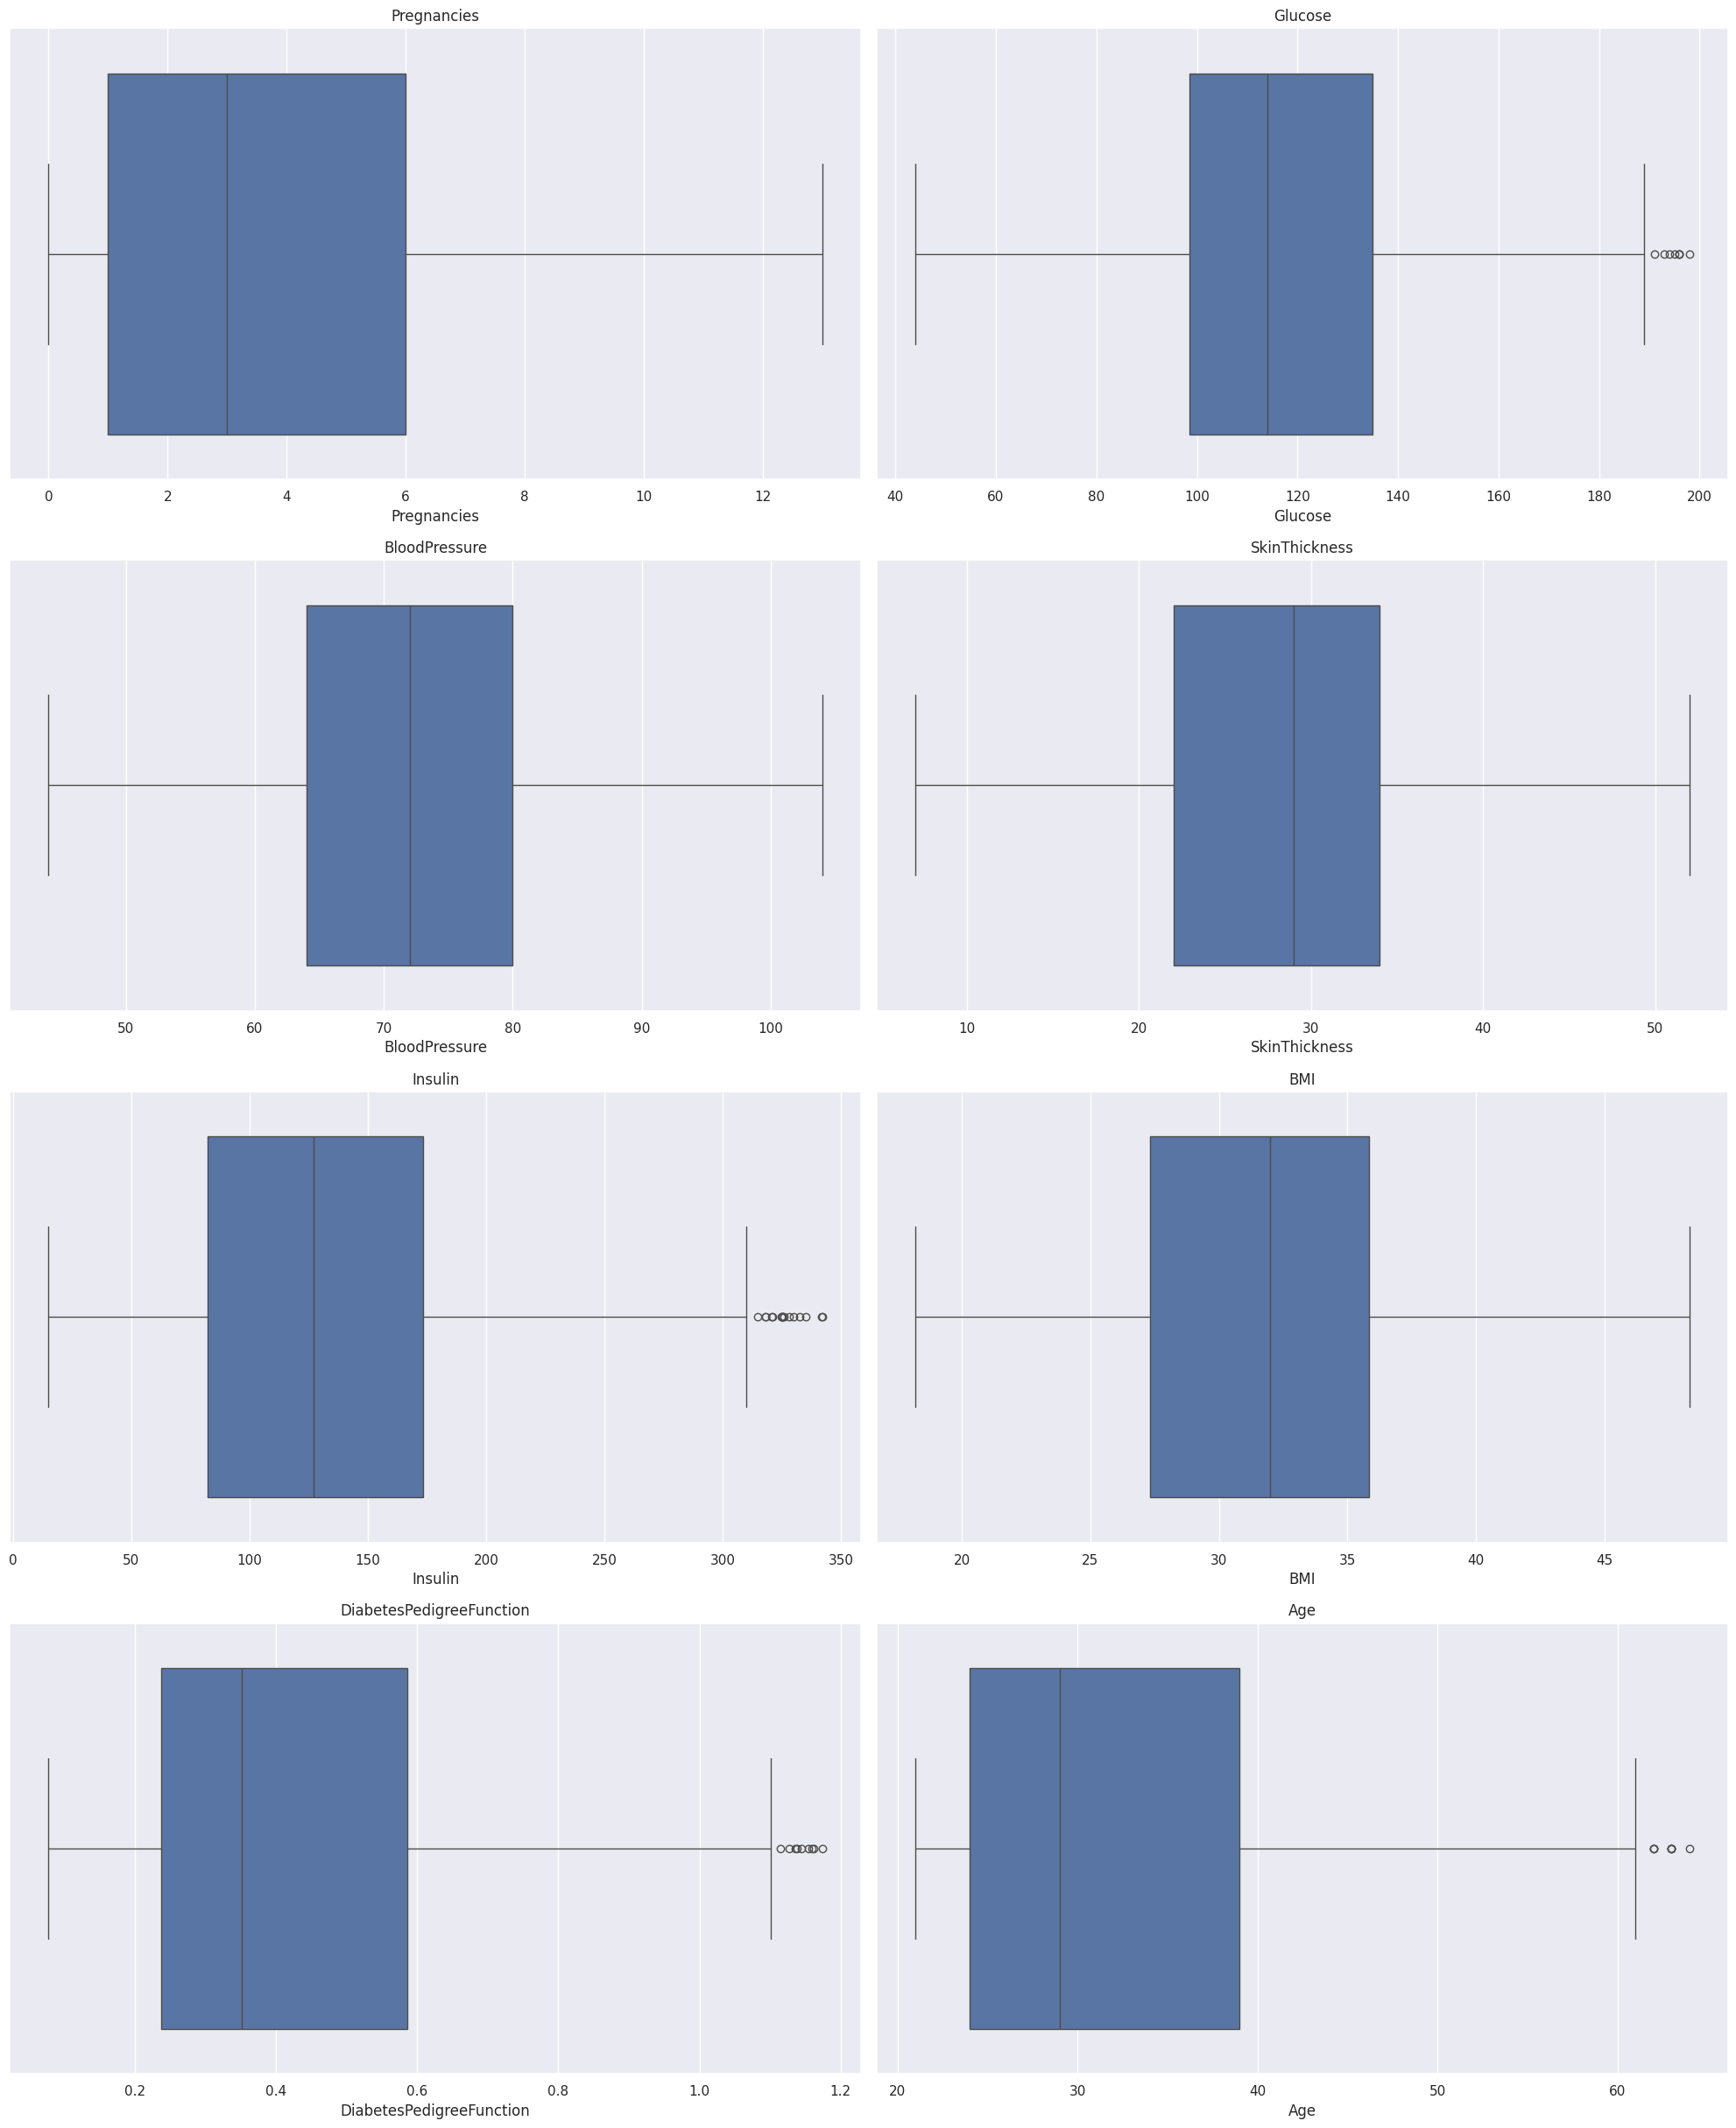

In [ ]:
## Re-checking outlier
plt.figure(figsize=(20,30))
for i, col in enumerate(independent_features):
  plt.subplot(5,2,i+1)
  sns.boxplot(data=data, x=col)
  plt.title('{}'.format(col))

plt.tight_layout()
plt.show()




1.BloodPressure,BMI and SkinThickness : No outliers detected after processing.

2.Glucose and Age: Few outliers exist on the upper boundary post-processing.

3.Insulin and DiabetesPedigreeFunction: The number of outliers is reduced.

4.No features have outliers on the lower boundary after the operation.

##Checking imbalance of data before and after removing outliers##

<Axes: xlabel='Outcome', ylabel='count'>

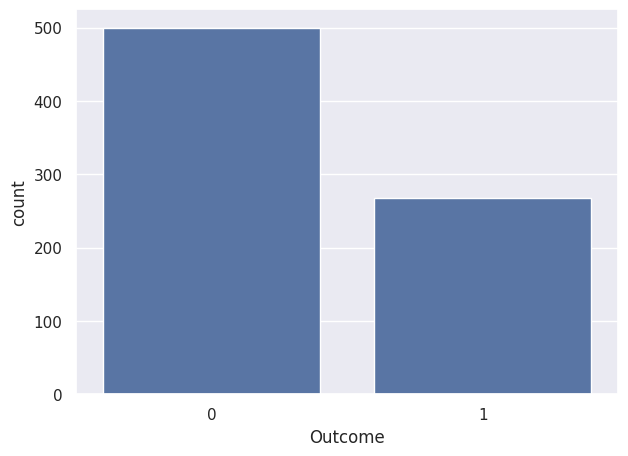

In [ ]:
##Before removing outliers
sns.countplot(data = di,x = 'Outcome')

<Axes: xlabel='Outcome', ylabel='count'>

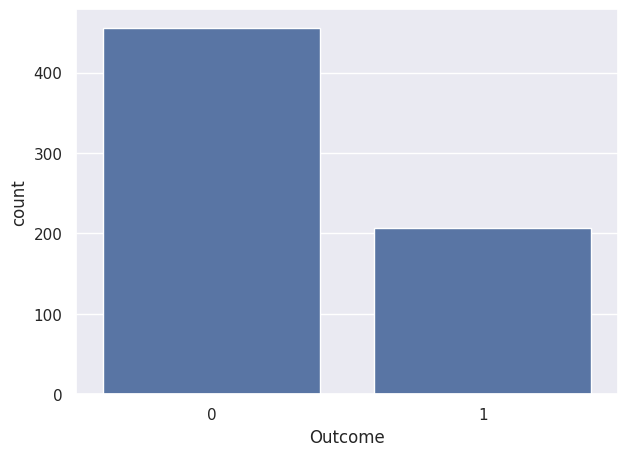

In [ ]:
##after removing outlier
sns.countplot(data = data,x = 'Outcome')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,162.743255,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,62.914770,26.6,0.351,31,0
2,8,183.0,64.0,26.464588,180.726394,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,19.939565,106.227522,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,169.595752,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,32.886413,130.228539,30.1,0.349,47,1


#Feature Selection

In [ ]:
## Feature selection
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,162.743255,33.6,0.627,50
1,1,85.0,66.0,29.000000,62.914770,26.6,0.351,31
2,8,183.0,64.0,26.464588,180.726394,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,19.939565,106.227522,25.6,0.201,30


In [ ]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

RELATIONSHIP BETWEEN INDEPENDENT FEATURE

In [ ]:
## checking correlation
correlation_matrix = X.corr()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.141512       0.209094       0.164987   
Glucose                      0.141512  1.000000       0.246521       0.196959   
BloodPressure                0.209094  0.246521       1.000000       0.224259   
SkinThickness                0.164987  0.196959       0.224259       1.000000   
Insulin                      0.119143  0.632935       0.183186       0.238086   
BMI                          0.051359  0.217058       0.275599       0.657062   
DiabetesPedigreeFunction     0.010716  0.083372       0.049582       0.082316   
Age                          0.580793  0.281201       0.370981       0.188698   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.119143  0.051359                  0.010716   
Glucose                   0.632935  0.217058                  0.083372   
BloodPressure             0.183186  0.275599    

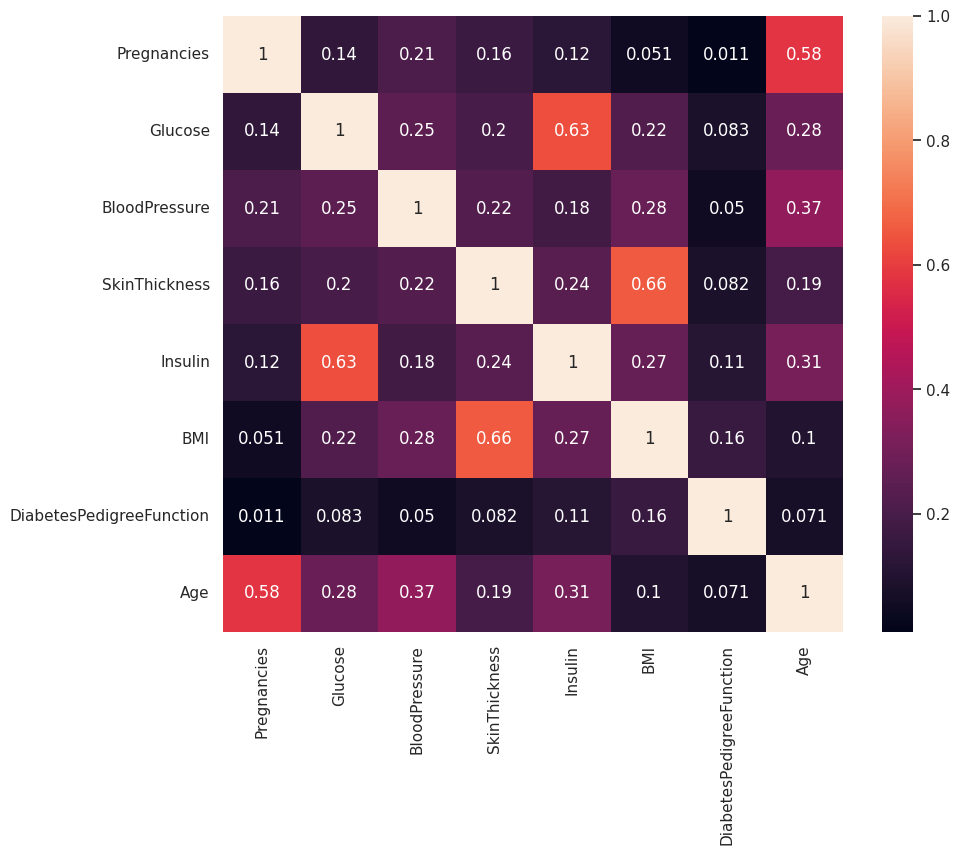

In [ ]:
## creating heatmap to check relation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Here we can find that multicollinearity in column insulin,BMI,age

In [ ]:
## so we have to drop those column
X=X.drop(["Age", "BMI", "Insulin"], axis = 1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
0,6,148.0,72.0,35.000000,0.627
1,1,85.0,66.0,29.000000,0.351
2,8,183.0,64.0,26.464588,0.672
3,1,89.0,66.0,23.000000,0.167
5,5,116.0,74.0,19.939565,0.201


In [ ]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

#Splitting data into Training and Test data

In [ ]:
##splitting data into training and test data##

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state= 16)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
301,2,144.0,58.0,33.000000,0.422
166,3,148.0,66.0,25.000000,0.256
679,2,101.0,58.0,17.000000,0.614
720,4,83.0,86.0,19.000000,0.317
341,1,95.0,74.0,21.000000,0.673
...,...,...,...,...,...
736,0,126.0,86.0,27.000000,0.515
377,1,87.0,60.0,37.000000,0.509
676,9,156.0,86.0,29.074643,0.230
141,5,106.0,82.0,30.000000,0.286


In [ ]:
y_train

301    1
166    0
679    0
720    0
341    0
      ..
736    0
377    0
676    1
141    0
281    0
Name: Outcome, Length: 530, dtype: int64

#Standardisation

In [ ]:
# Importing StandardScaler from sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler
 # Initialize StandardScaler object
st = StandardScaler()

In [ ]:
X_train_sc = st.fit_transform(X_train)
X_test_sc = st.transform(X_test)

In [ ]:
X_train_sc

array([[-0.53777183,  0.930267  , -1.24988222,  0.51539906,  0.0080528 ],
       [-0.23195738,  1.07078701, -0.51563945, -0.39618115, -0.68858945],
       [-0.53777183, -0.58032315, -1.24988222, -1.30776136,  0.81380768],
       ...,
       [ 1.60292933,  1.35182704,  1.31996747,  0.06811429, -0.79770209],
       [ 0.37967153, -0.40467313,  0.95284609,  0.17355648, -0.56269024],
       [ 1.90874378,  0.40331695,  0.40216401, -0.05433857, -0.58787008]])

In [ ]:
X_test_sc

array([[ 0.99130043,  1.14104702, -0.51563945,  1.54092679,  1.25025824],
       [ 2.52037268,  0.78974699,  1.22818713,  0.51539906, -0.73894913],
       [-1.14940073,  2.51111716,  2.9720137 , -0.39618115,  0.06260912],
       [ 0.07385707, -0.75597317, -1.43344291, -1.30776136, -0.33607168],
       [ 0.99130043, -0.54519315,  0.21860332,  1.31303174, -0.90681473],
       [-0.84358628, -0.72084317, -0.69920014, -1.07986631, -0.50813392],
       [-1.14940073, -0.54519315,  1.31996747, -1.30776136,  1.15373552],
       [-1.14940073,  0.08714692,  0.21860332, -1.19381383, -0.56688688],
       [ 0.68548598, -0.0885031 , -1.06632153,  1.19908422, -0.73475249],
       [-0.53777183,  1.9841671 ,  1.50352817,  0.97118916,  0.94810016],
       [ 1.90874378, -0.0885031 ,  2.42133163, -0.70779728,  2.52603681],
       [ 0.07385707, -0.12363311, -0.69920014, -0.50002759, -1.23415265],
       [ 0.99130043,  0.64922697,  0.21860332, -0.28223362,  0.9522968 ],
       [-0.53777183, -0.68571316, -1.0

##Applying ML algorithms to the pre-processed columns to find out which of these algorithms is best suited##


# Logistic Regression

In [ ]:
## Importing logistic regression model
from sklearn.linear_model import LogisticRegression
# Creating a Logistic Regression model
lo = LogisticRegression(random_state=0)

In [ ]:
# Fitting the Logistic Regression model to the standardized training data
lo.fit(X_train_sc,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Making predictions on the standardized test data using the trained Logistic Regression model
lo_pred = lo.predict(X_test_sc)

In [ ]:
# Importing metrics for evaluating the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score

In [ ]:
confusion_mat = confusion_matrix(y_test,lo_pred)
confusion_mat

array([[77, 13],
       [15, 28]])

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, lo_pred), 2))

0.79


In [ ]:
print(round(precision_score(y_test, lo_pred), 2))

0.68


In [ ]:
print(round(recall_score(y_test, lo_pred), 2))

0.65


In [ ]:
print(round(f1_score(y_test, lo_pred), 2))

0.67


##Cross Validation##

In [ ]:
# Importing cross_val_score from sklearn.model_selection to perform cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform 5-fold cross-validation
scores = cross_val_score(lo, X, y, cv=5)  # X is your features, y is your target variable

In [ ]:
# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", scores)

# Print the mean cross-validation score
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.72180451 0.7443609  0.77443609 0.79545455 0.81060606]
Mean Accuracy: 0.7693324219640009


##Using KNN model##

In [ ]:
# Importing KNeighborsClassifier from sklearn.neighbors for K-Nearest Neighbors classification
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating a K-Nearest Neighbors classifier
kn = KNeighborsClassifier(n_neighbors=5 , metric='minkowski', p=2)

In [ ]:
# Fitting the K-Nearest Neighbors classifier to the scaled training data
kn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions using the trained K-Nearest Neighbors classifier on the scaled test data
kn_pred = kn.predict(X_test_sc)

In [ ]:
kn_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [ ]:
kn_cm= confusion_matrix(y_test, kn_pred)
print(kn_cm)
kn_score=accuracy_score(y_test, kn_pred)
print(kn_score)

[[77 13]
 [20 23]]
0.7518796992481203


#Cross validation

In [ ]:
# Importing KFold from sklearn.model_selection for K-Fold cross-validation
from sklearn.model_selection import KFold

In [ ]:
# K-Fold cross-validation object Creation
kf = KFold(n_splits= 5,shuffle=True,random_state= 42)

In [ ]:
## ##cross validation score
C_scores = cross_val_score(kn, X_train_sc,y_train, cv=kf)

In [ ]:
 ##Cross-validation scores ka mean aur standard deviation nikalein
print("Cross-Validation Scores:", C_scores)
print("Mean CV Score:", C_scores.mean())
print("Standard Deviation of CV Scores:", C_scores.std())

Cross-Validation Scores: [0.72641509 0.73584906 0.74528302 0.74528302 0.73584906]
Mean CV Score: 0.7377358490566037
Standard Deviation of CV Scores: 0.007059730918441398


##Using SVM##

In [ ]:
## importing svm model
from sklearn import svm

In [ ]:
## creating svm classifier

svm_clf =svm.SVC(kernel = 'linear')

In [ ]:
svm_clf.fit(X_train_sc,y_train) #Train the model using the training sets


SVC(kernel='linear')

In [ ]:
# Making predictions using the trained Support Vector Machine classifier on the scaled test data

svm_pred = svm_clf.predict(X_test_sc)

In [ ]:
# Creating a confusion matrix for the predictions made by the Support Vector Machine classifier
svm_cm= confusion_matrix(y_test, svm_pred)
svm_cm

array([[76, 14],
       [15, 28]])

In [ ]:
## classification report for evaluating the performance
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        90
           1       0.67      0.65      0.66        43

    accuracy                           0.78       133
   macro avg       0.75      0.75      0.75       133
weighted avg       0.78      0.78      0.78       133



##Cross validation for svm

In [ ]:
svm_scores = cross_val_score(svm_clf, X, y, cv=5)  # cv=5 means 5-fold cross-validation

In [ ]:
# Step 4: Cross-Validation Scores Print Karein
print("Cross-Validation Scores:", svm_scores)
print("Average Accuracy:", svm_scores.mean())

Cross-Validation Scores: [0.72180451 0.7443609  0.78195489 0.81818182 0.79545455]
Average Accuracy: 0.7723513328776487


##Using Dicision Tree##

In decision tree model we dont need standardisation

In [ ]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

In [ ]:
# Fitting the Decision Tree classifier to the training data
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Making predictions using the trained Decision Tree classifier on the test data
dt_pred = dt.predict(X_test)

In [ ]:
# Creating a confusion matrix for the predictions made by the Decision Tree classifier
dt_cm= confusion_matrix(y_test, dt_pred)
dt_cm

array([[60, 30],
       [18, 25]])

In [ ]:
## classification report for evaluating the performance
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        90
           1       0.45      0.58      0.51        43

    accuracy                           0.64       133
   macro avg       0.61      0.62      0.61       133
weighted avg       0.67      0.64      0.65       133



#Cross validation

In [ ]:
# Create K-Fold Cross-Validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
cv_results = cross_val_score(dt, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Cross-Validation Results:")
print(cv_results)
print("Average Accuracy:", np.mean(cv_results))


Cross-Validation Results:
[0.72180451 0.64661654 0.71428571 0.73484848 0.64393939]
Average Accuracy: 0.6922989291410344


##Using XGBoost##

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree

plt.style.use('ggplot')

In [ ]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
#data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

In [ ]:
# Create an XGBoost classifier
xgc = xgb.XGBClassifier()

In [ ]:
# Train the classifier on the training data
xgc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Figure size 2000x1500 with 0 Axes>

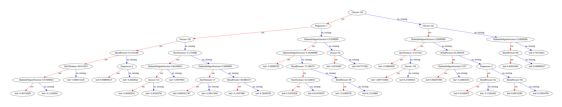

In [ ]:
# Figure ki size set karein
plt.figure(figsize=(20, 15))

# Ek decision tree ko plot karein
plot_tree(xgc, num_trees=0)
plt.show()

In [ ]:
# Make predictions on the testing data
xg_pred = xgc.predict(X_test)

In [ ]:
# Classification report generate karein
xgb_report = classification_report(y_test, xg_pred)
print(xgb_report)


              precision    recall  f1-score   support

           0       0.80      0.79      0.79        90
           1       0.57      0.58      0.57        43

    accuracy                           0.72       133
   macro avg       0.68      0.69      0.68       133
weighted avg       0.72      0.72      0.72       133



In [ ]:
# Confusion matrix generate karein
xgb_cm = confusion_matrix(y_test, xg_pred)
print(xgb_cm)

[[71 19]
 [18 25]]


##Using Random forest##

In [ ]:
# Import Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest Classifier with 10 estimators and "entropy" criterion
rf = RandomForestClassifier(n_estimators= 10, criterion= "entropy")

In [ ]:
# Fit the Random Forest Classifier to the training data
rf.fit(X_train_sc,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
# Use the trained Random Forest Classifier to make predictions on the test data
rf_pred = rf.predict(X_test_sc)

In [ ]:
# Classification report
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        90
           1       0.56      0.53      0.55        43

    accuracy                           0.71       133
   macro avg       0.67      0.67      0.67       133
weighted avg       0.71      0.71      0.71       133



In [ ]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[72 18]
 [20 23]]


In [ ]:
## # Calculate accuracy score
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


#Cross validation

In [ ]:
## cross validation
# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf, X, y, cv=5)

# Print the scores
print("Cross-Validation Scores:", rf_scores)
print("Average Accuracy:", rf_scores.mean())

Cross-Validation Scores: [0.71428571 0.73684211 0.77443609 0.81060606 0.75757576]
Average Accuracy: 0.7587491455912507


In [ ]:
trainaccuracy = rf.score(X_train, y_train)
testacuuracy = rf.score(X_test, y_test)

In [ ]:
print(trainaccuracy)
print(testacuuracy)

0.30943396226415093
0.3233082706766917


In [ ]:
trainaccuracy1 = rf.score(X_train_sc, y_train)
testacuuracy1 = rf.score(X_test_sc, y_test)

In [ ]:
print(trainaccuracy1)
print(testacuuracy1)

0.9792452830188679
0.7142857142857143


#Hypertuning the model

In [ ]:
# Import GridSearchCV from scikit-learn for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter grid for Random Forest Classifier
parameter = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Create a GridSearchCV object
# Create a GridSearchCV object for Random Forest with scoring='accuracy'
grid_search = GridSearchCV(estimator=rf, param_grid=parameter, scoring='accuracy', cv=5)

In [ ]:
# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Best score
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Model: RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50)
Best score: 0.7849056603773585


In [ ]:
# Use the best model to make predictions
y_pred_rf = best_model.predict(X_test_sc)

In [ ]:
# Confusion Matrix
gs_cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:","\n",gs_cm)

# Accuracy
gs_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", gs_accuracy)

# Precision
gs_precision = precision_score(y_test, y_pred_rf)
print("Precision:", gs_precision)

# Recall
gs_recall = recall_score(y_test, y_pred_rf)
print("Recall:", gs_recall)

# F1-Score
gs_f1 = f1_score(y_test, y_pred_rf)
print("F1-Score:", gs_f1)

Confusion Matrix: 
 [[79 11]
 [17 26]]
Accuracy: 0.7894736842105263
Precision: 0.7027027027027027
Recall: 0.6046511627906976
F1-Score: 0.6499999999999999


#CONCLUSION#

Based on the accuracy scores obtained from various machine learning models applied to the diabetes dataset:

Logistic Regression: Achieved an accuracy of 0.79.

K-Nearest Neighbors (KNN): Achieved an accuracy of 0.75.

Support Vector Machine (SVM): Achieved an accuracy of 0.78.

Decision Tree: Achieved an accuracy of 0.64.

XGBoost: Achieved an accuracy of 0.72.

Random Forest: Achieved an accuracy of 0.71.

Random Forest with Hyperparameter Tuning: Achieved an accuracy of 0.78.

Prediction was performed on the diabetes dataset, wherein logistic regression, SVM, and random forest with hyperparameter tuning demonstrated good prediction accuracy, achieving 78%. Other models yielded moderate prediction accuracy.